# Esercizi sulle variabili aleatorie discrete

### Librerie

In [14]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
from scipy.stats import geom
from scipy.stats import multinomial

1. Due centralini, tra di loro indipendenti, ricevono nell’unità di tempo un numero di telefonate X e Y
aventi legge di Poisson di parametri rispettivamente λ e μ.
- Qual è la probabilità che nell’unità di tempo i due centralini ricevano insieme non più di tre
telefonate, supponendo λ = 2 e μ = 4?
- Calcolare la legge condizionale di X dato X+Y=n. Si tratta di una densità nota? Quanto vale la
media di questa legge condizionale?
- Supponendo λ = 2 e μ = 4 e sapendo che nell’unità di tempo i due centralini hanno ricevuto
complessivamente 8 telefonate, qual è la probabilità che il primo ne abbia ricevute 3?

In [2]:
lam = 2 # parametro di X
mu = 4 # parametro di Y
k = 3

p_es1 = sum(poisson.pmf(k, lam+mu) for k in range(0, k+1)) # X + Y segue una Poisson (lambda + mu)

p_es1

0.15120388277664787

# ???

In [3]:
Bayes = lambda A,B : (A*B)/B

k_tot = 8
k1 = 3
k2 = k_tot - 3
lambda_mu = lam + mu

p_es1 = Bayes(poisson.pmf(k1, lam), poisson.pmf(k_tot, lambda_mu))

p_es1

0.18044704431548358

2. Da una rilevazione risulta che il numero di incidenti stradali che avvengono ad un determinato
incrocio in un mese segue una distribuzione di Poisson con valor medio 1.5.
- Qual è la probabilità che in un mese non ci siano incidenti?
- Qual è la probabilità che in un mese ci siano più di due incidenti?

In [4]:
lam = 1.5
k = 0
p_es2 = poisson.pmf(k, lam)

p_es2

0.22313016014842982

In [5]:
p_es2 = 1-sum(poisson.pmf(k, lam) for k in range(0, 3))

p_es2 

0.19115316946194194

3) La probabilità di contrarre una malattia rara è dello 0.03%.
- Qual è la probabilità che in una città dove vivono 20.000 persone vi siano meno di 4 persone che contraggono la malattia?
- Costruire il grafico della densità e della funzione di ripartizione della distribuzione in esame.

In [6]:
p = 0.03/100
n = 20000
k = 4
lam = n*p

p_es3 = sum(poisson.pmf(k, lam) for k in range(0, 4)) # P(X < 4)

p_es3

0.15120388277664804

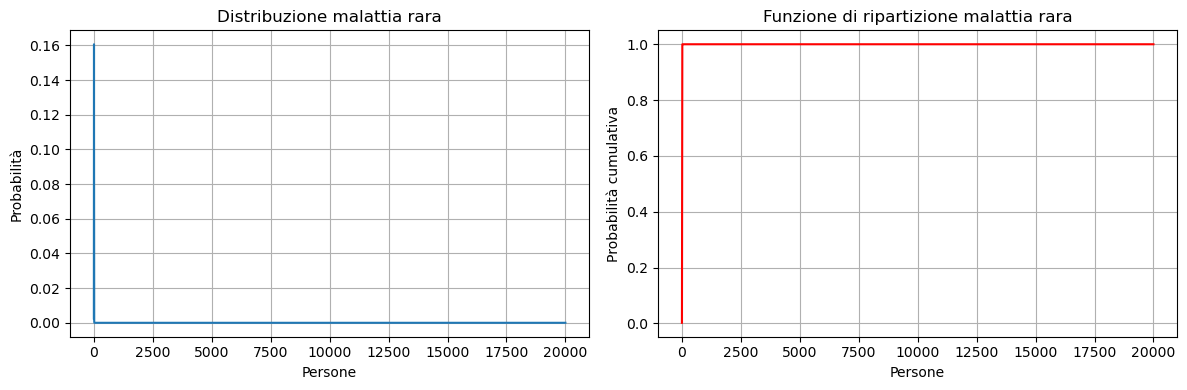

In [7]:
x = range(0, n+1)
y_pmf = poisson.pmf(x, lam)
y_cdf = poisson.cdf(x, lam)

plt.figure(figsize=(12, 4))

# Grafico della densità
plt.subplot(121)
plt.plot(x, y_pmf)
plt.title("Distribuzione malattia rara")
plt.xlabel("Persone")
plt.ylabel("Probabilità")
plt.grid()

# Grafico della funzione di ripartizione
plt.subplot(122)
plt.plot(x, y_cdf, 'r')
plt.title("Funzione di ripartizione malattia rara")
plt.xlabel("Persone")
plt.ylabel("Probabilità cumulativa")
plt.grid()

plt.tight_layout()  # Ottimizza la disposizione dei subplot
plt.show()

4) Si lancia un dado equilibrato finché non esca un numero dispari.
- Qual è la probabilità che ciò avvenga al quarto tentativo?
- Quanti tentativi sono necessari affinché si abbia una probabilità maggiore del 95% che esca un
numero dispari esattamente al tentativo successivo?
- Sapendo che nei primi 4 lanci non si è avuto un numero dispari, qual è la probabilità che si
abbia un numero dispari per la prima volta al settimo tentativo?

In [8]:
p = 1/2
t = 4 # tempo di primo successo

p_es4 = geom.pmf(t, p)
p_es4

0.0625

In [13]:
p_target = 95/100

n = 1
while True:
    pn = geom.pmf(n, p) # probabilità di ottenere un successo dopo n tentativi
    print(f'p{n}: {pn}')
    if 1-pn >= p_target:
        break
    n += 1
n

p1: 0.5
p2: 0.25
p3: 0.125
p4: 0.0625
p5: 0.03125


5

In [10]:
# P(T = 7 | T > 4) -> P (T = 3)

t = 3
p_es4 = geom.pmf(t, p)
p_es4

0.125

5) Si supponga che tre negozi della stessa tipologia attraggano rispettivamente il 20% della clientela, il
45% e il 35%. 
- Scegliendo a caso 6 clienti, qual è la probabilità che 2 vadano nel primo negozio, 1 nel
secondo e 3 nel terzo? 
- Qual è la probabilità che nessun cliente vada nel primo negozio?

In [15]:
n = 6
w = [2, 1, 3]  # Esiti
q = [20/100, 45/100, 35/100]  # Probabilità normalizzate per un dado non truccato

p_es5 = multinomial.pmf(w, n, q)

p_es5

0.04630500000000001

In [12]:
p_es5 = 0
for i in range(7):
    w = [0, i, 6-i]
    p_es5 += multinomial.pmf(w, n, q)

p_es5

0.2621440000000001